2. Take grayscale image of size 512x512 and perform the following operations –

    1. Perform the brightness enhancement of a specific range of gray levels and observe its result
    2. Differentiate the results of power law transform and inverse logarithmic transform
    3. Find the difference image between original and the image obtained by last three bits (MSB)

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


(512, 512, 3)


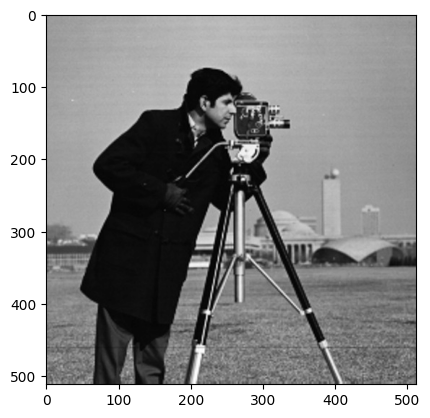

In [8]:
camera_man = cv.imread('camera.png')
plt.imshow(camera_man)
print(camera_man.shape)

(512, 512)


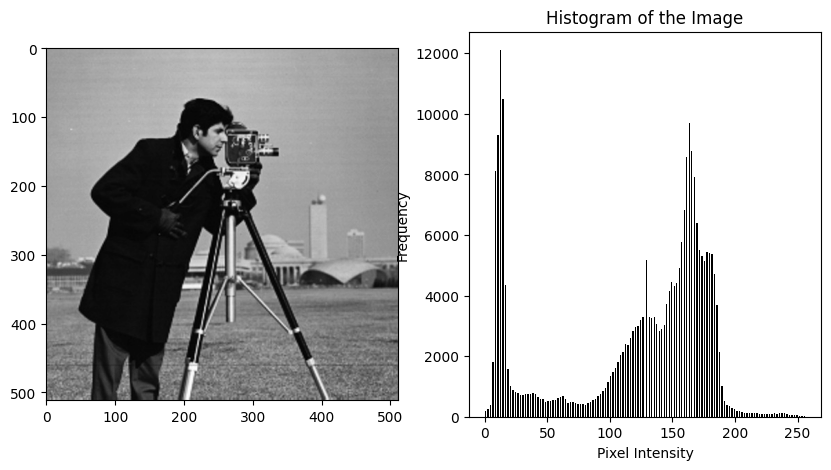

In [9]:
camera_man_gray = cv.cvtColor(camera_man, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(camera_man_gray, cmap='gray')
print(camera_man_gray.shape)

plt.subplot(1, 2, 2)
plt.hist(camera_man_gray.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

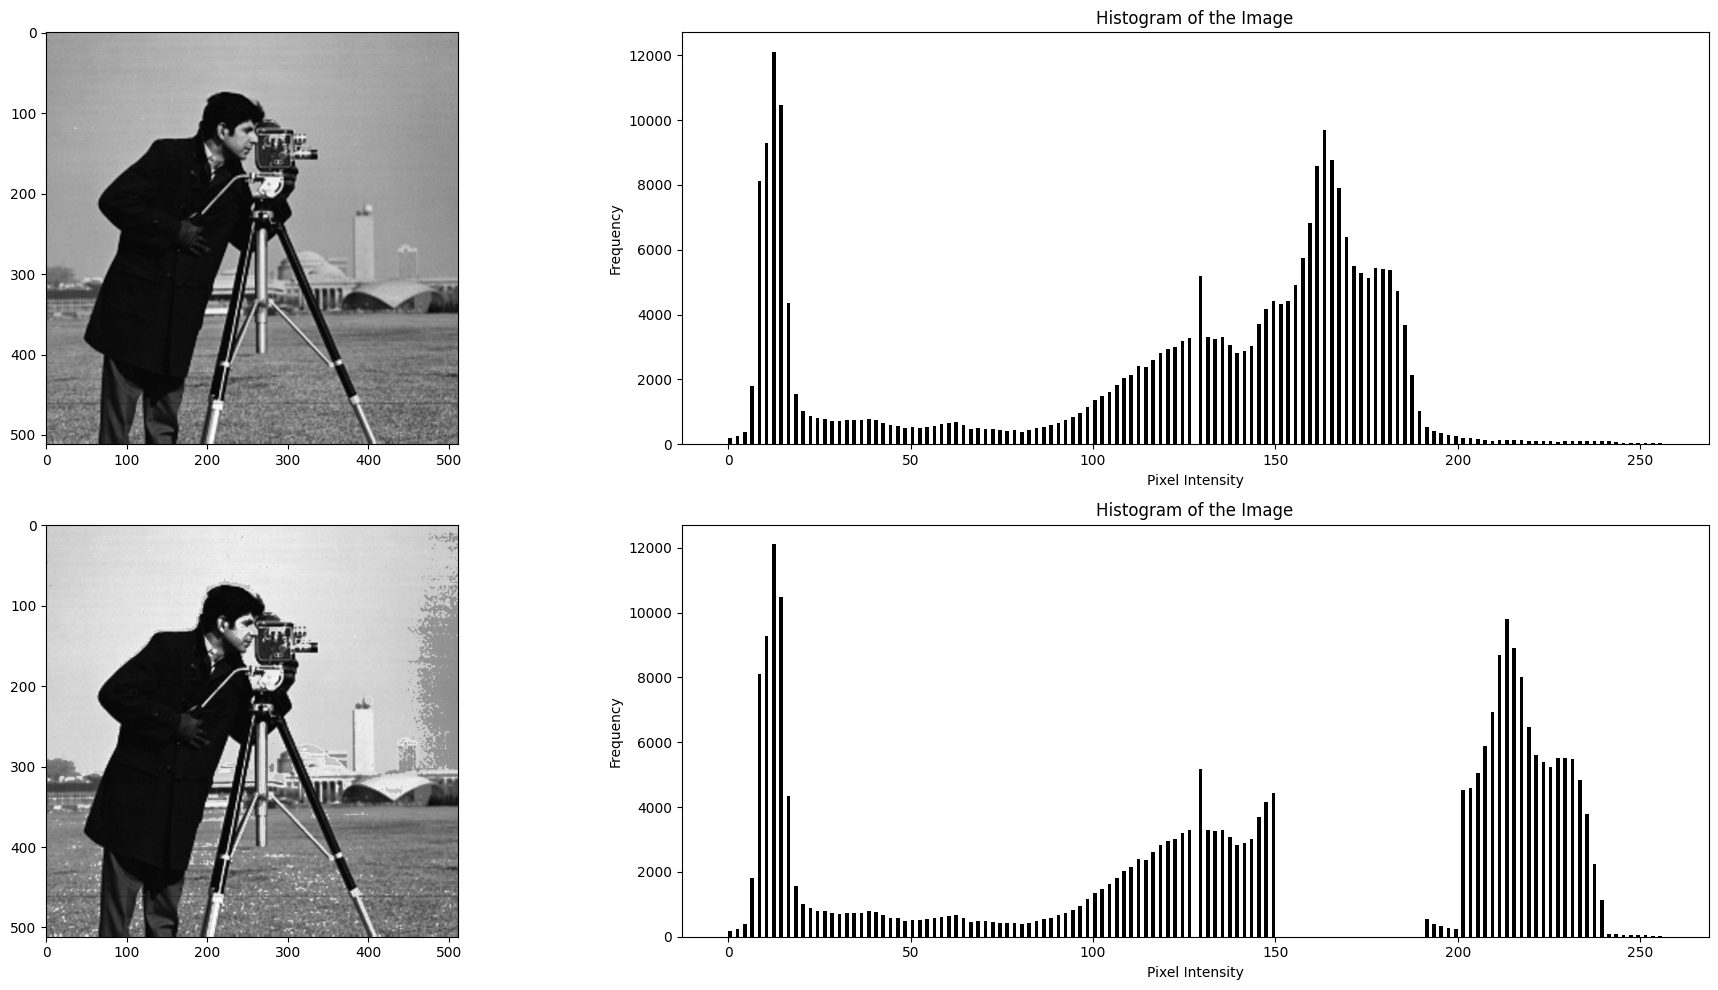

In [25]:
lower_bound = 150
upper_bound = 190
enhancement_value = 50

enhanced_image = camera_man_gray.copy()

# image_float = camera_man_gray.astype(np.float32)

enhanced_image[(camera_man_gray >= lower_bound) & (camera_man_gray <= upper_bound)] += enhancement_value

# image_float[(image_float >= lower_bound) & (image_float <= upper_bound)] += enhancement_value

# image_float = np.clip(image_float, 0, 255)

# enhanced_image = image_float.astype(np.uint8)

enhanced_image = np.clip(enhanced_image, 0, 255)


plt.figure(figsize=(20, 10))


plt.subplot(2, 2, 1)
plt.imshow(camera_man_gray, cmap='gray')
# print(camera_man_gray.shape)

plt.subplot(2, 2, 2)
plt.hist(camera_man_gray.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.imshow(enhanced_image, cmap='gray')
# print(enhanced_image.shape)

plt.subplot(2, 2, 4)
plt.hist(enhanced_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

/tmp/ipykernel_5873/3881898279.py:6: RuntimeWarning: overflow encountered in scalar add
  c_log = 255 / np.log(1 + camera_man_gray.max())
/tmp/ipykernel_5873/3881898279.py:6: RuntimeWarning: divide by zero encountered in log
  c_log = 255 / np.log(1 + camera_man_gray.max())
/tmp/ipykernel_5873/3881898279.py:7: RuntimeWarning: divide by zero encountered in log
  log_transformed = c_log * np.log(1 + camera_man_gray)
/tmp/ipykernel_5873/3881898279.py:7: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c_log * np.log(1 + camera_man_gray)
/tmp/ipykernel_5873/3881898279.py:8: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)


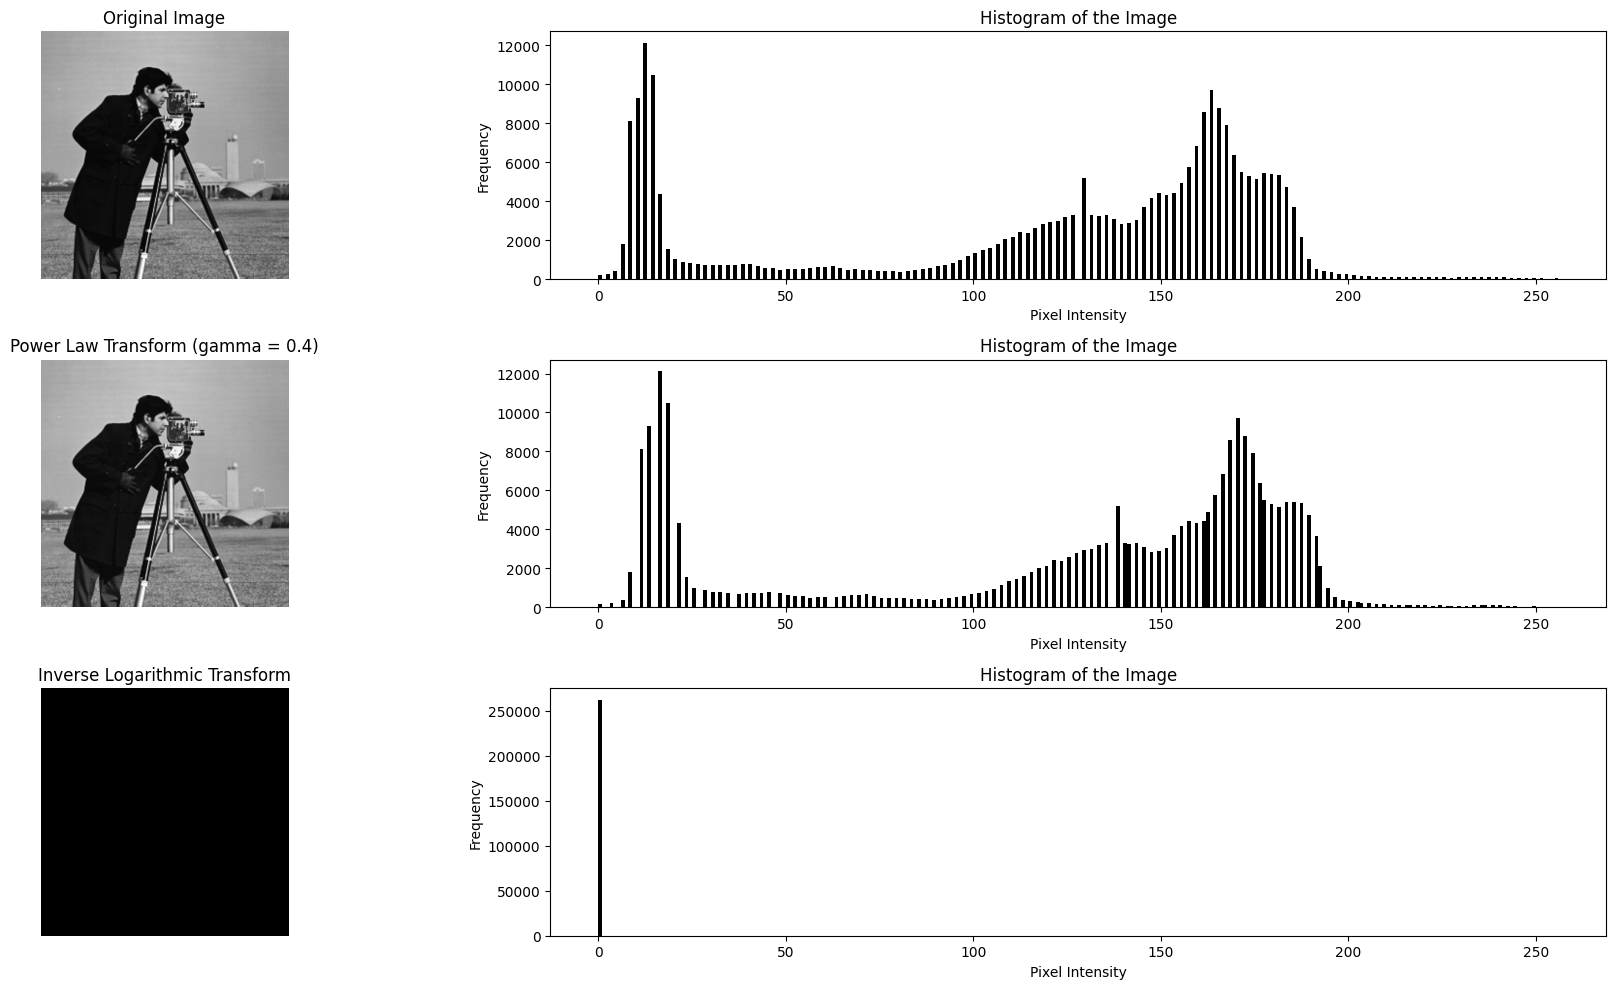

In [35]:
gamma = 0.9
c = 255 / (camera_man_gray.max() ** gamma) 
power_law_transformed = c * (camera_man_gray ** gamma)
power_law_transformed = np.clip(power_law_transformed, 0, 255).astype(np.uint8)

c_log = 255 / np.log(1 + camera_man_gray.max()) 
log_transformed = c_log * np.log(1 + camera_man_gray)
log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
plt.imshow(camera_man_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(camera_man_gray.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.imshow(power_law_transformed, cmap='gray')
plt.title("Power Law Transform (gamma = 0.4)")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(power_law_transformed.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.imshow(log_transformed, cmap='gray')
plt.title("Inverse Logarithmic Transform")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(log_transformed.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

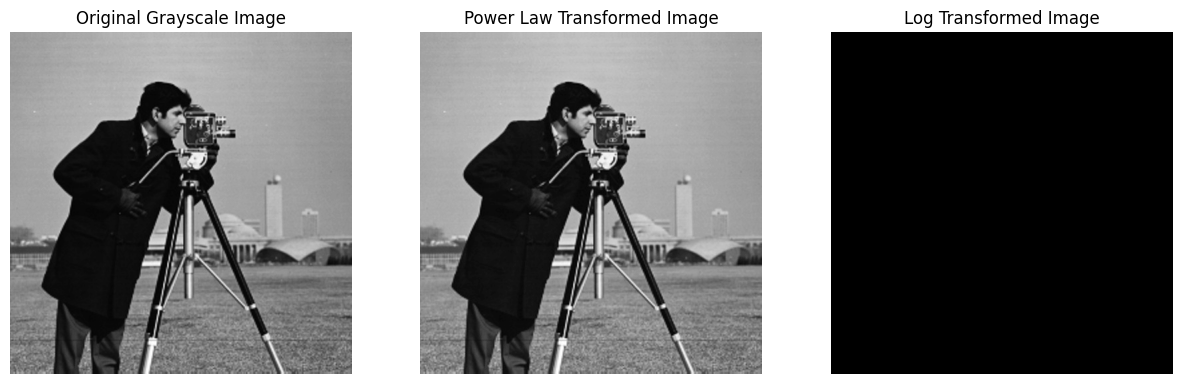

In [36]:
# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(camera_man_gray, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')  # Hide axes for clarity

axes[1].imshow(power_law_transformed, cmap='gray')
axes[1].set_title('Power Law Transformed Image')
axes[1].axis('off')

axes[2].imshow(log_transformed, cmap='gray')
axes[2].set_title('Log Transformed Image')
axes[2].axis('off')